In [1]:
#  ========================================================================================================
#  =                                       Loading Data and Packages                                      =
#  ========================================================================================================

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import operator
import math
import csv
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy import stats
from scipy.stats.stats import pearsonr
from scipy.stats import norm
from sklearn import linear_model
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import ElasticNet, LinearRegression
%matplotlib inline


In [3]:
#  ========================================================================================================
#  =                                       Loading DataFrame                                              =
#  ========================================================================================================

In [4]:
df = pd.read_csv("train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df_t = pd.read_csv("train.csv")
df_t.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
# Check the numbers of samples and features
print("The train data size before dropping Id feature is : {} ".format(df.shape))

# Now drop the 'Id' column since it's unnecessary for the prediction process.
df.drop(['Id'], axis=1, inplace = True)

# Check data size after dropping the 'Id' variable
print("\nThe train data size after dropping Id feature is : {} ".format(df.shape)) 

The train data size before dropping Id feature is : (1460, 81) 

The train data size after dropping Id feature is : (1460, 80) 


In [7]:
#  ========================================================================================================
#  =                              Analyzing the target variable "Sale Price"                              =
#  ========================================================================================================

In [8]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [9]:
#  ========================================================================================================
#  =                                            Checking the Columns                                      =
#  ======================/==================================================================================

df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [10]:
# =======================         Checking Categorial Data          ======================= 

df.select_dtypes(include=['object']).columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [11]:
# =======================         Checking Numerical Data          ======================= 

df.select_dtypes(include=['int64','float64']).columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [12]:
categorial = len(df.select_dtypes(include=['object']).columns)
numerical = len(df.select_dtypes(include=['int64','float64']).columns)
print('Total Features: ', categorial, 'categorical', '+',numerical, 'numerical', '=', categorial+numerical, 'features')

Total Features:  43 categorical + 37 numerical = 80 features


In [13]:
#  ========================================================================================================
#  =                                           Correlation Matrix                                         =
#  ========================================================================================================

df_corr = df.corr()

Text(0.5, 1, 'Heatmap showing the Correlation between variables')

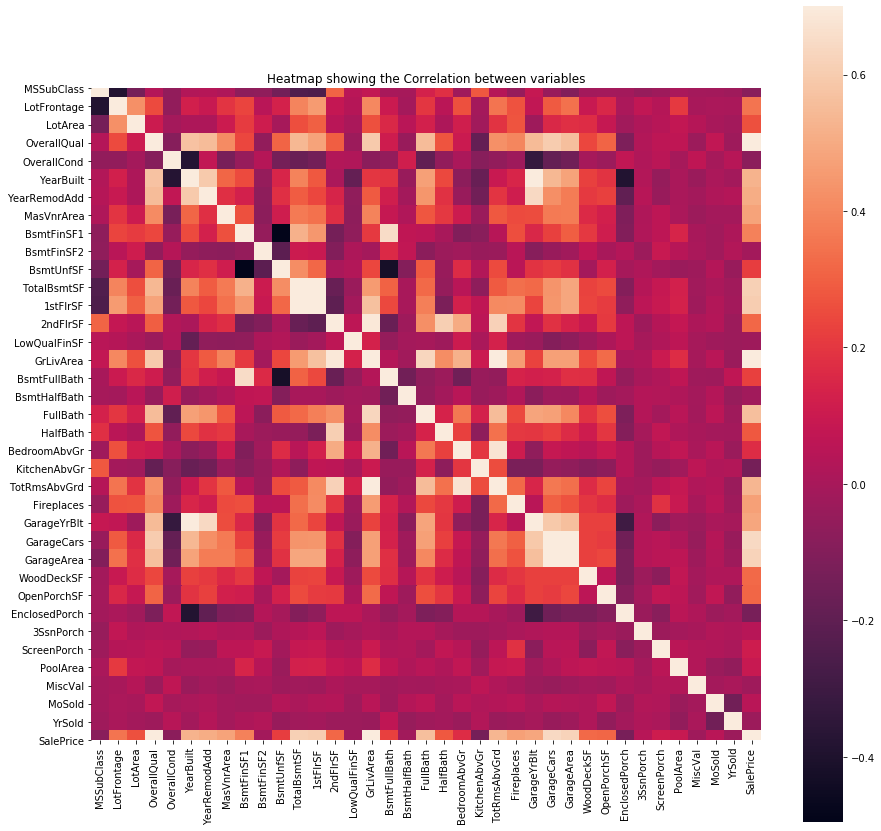

In [14]:
# =======================         Correlation Matrix Heatmap          ======================= 

f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(df_corr, vmax=.7, square=True);
ax.set_title('Heatmap showing the Correlation between variables')

In [15]:
df_temp = df_corr['SalePrice']
df_df = pd.DataFrame(df_temp)
df_df.sort_values(["SalePrice"], axis=0, ascending=False, inplace=True) 
df_df 

,SalePrice
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897


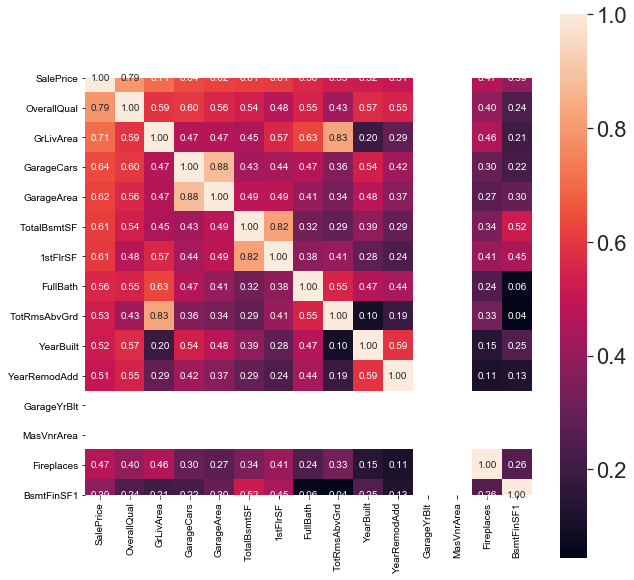

In [16]:
# Top 10 Heatmap
k = 15 #number of variables for heatmap
cols = df_df.nlargest(k, 'SalePrice')['SalePrice'].index
f, ax = plt.subplots(figsize=(10, 10))
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=2)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [17]:
most_corr = pd.DataFrame(cols)
most_corr.columns = ['Most Correlated Features']
most_corr

,Most Correlated Features
0,SalePrice
1,OverallQual
2,GrLivArea
3,GarageCars
4,GarageArea
5,TotalBsmtSF
6,1stFlrSF
7,FullBath
8,TotRmsAbvGrd
9,YearBuilt


In [18]:
val = df.values
count = 0
for i in range(len(val)):
    for j in range(len(val[i])):
        if not val[i][j]:
            count += 1
print("Null Values =",count)

Null Values = 17364


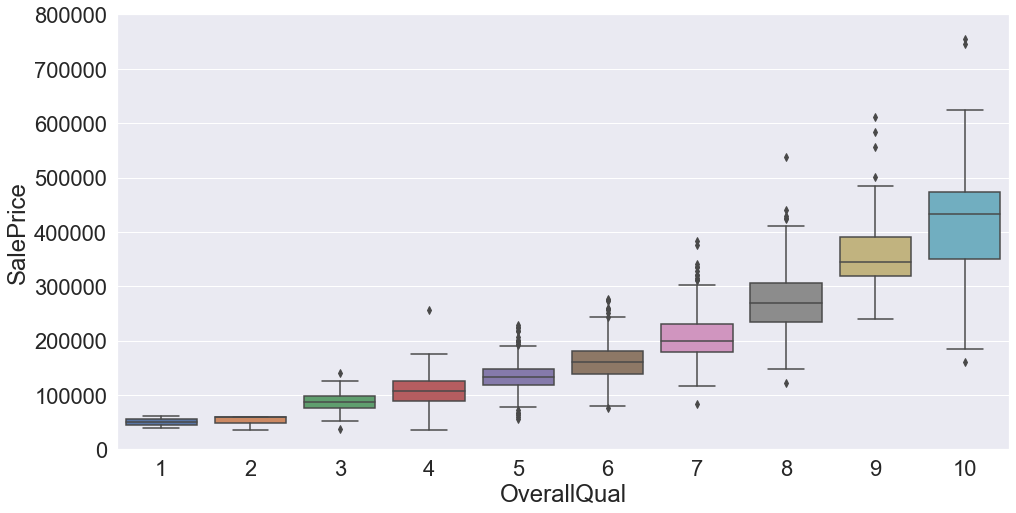

In [19]:
#  ========================================================================================================
#  =                                     Overall Quality vs Sale Price                                    =
#  ========================================================================================================
var = 'OverallQual'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

In [20]:
#df = df.drop(df[(df['SalePrice']>720000)].index).reset_index(drop=True)
               


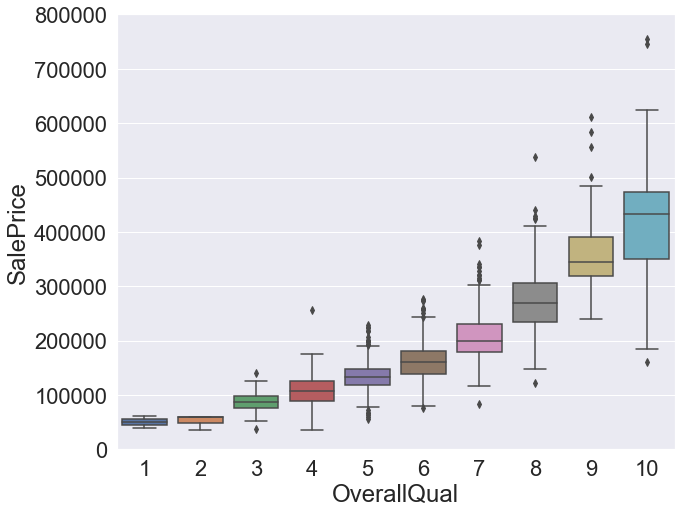

In [21]:
#  ========================================================================================================
#  =                                     Overall Quality vs Sale Price                                    =
#  ========================================================================================================
var = 'OverallQual'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(10,8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

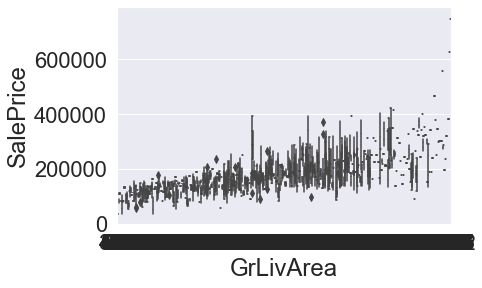

In [22]:
#  ========================================================================================================
#  =                                       Living Area vs Sale Price                                      =
#  ========================================================================================================
sns.boxplot(x=df['GrLivArea'], y=df['SalePrice'])

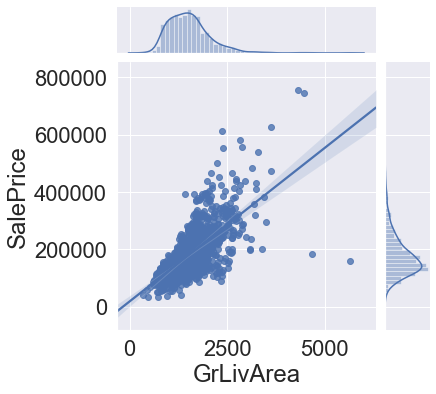

In [23]:
sns.jointplot(x=df['GrLivArea'], y=df['SalePrice'], kind='reg')
#sns.jointplot(x=df['GrLivArea'], y=df['SalePrice'])

In [24]:
#  ========================================================================================================
#  =                                            Removing Outliers                                         =
#  ========================================================================================================

df = df.drop(df[(df['GrLivArea']>4000) & (df['SalePrice']<300000)].index).reset_index(drop=True)

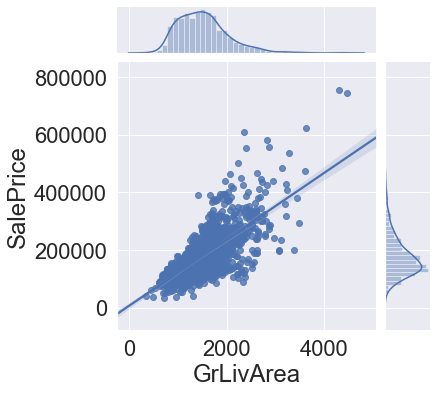

In [25]:
#  ========================================================================================================
#  =                       Living Area vs Sale Price after removing outliers                              =
#  ========================================================================================================
sns.jointplot(x=df['GrLivArea'], y=df['SalePrice'], kind='reg')

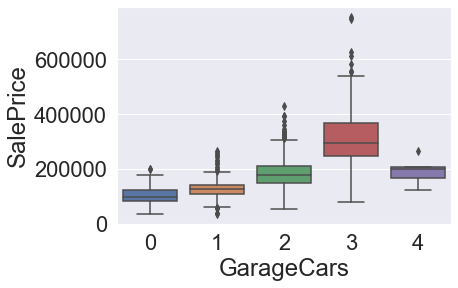

In [26]:
#  ========================================================================================================
#  =                                   Garage Capacity vs Sale Price                                      =
#  ========================================================================================================
sns.boxplot(x=df['GarageCars'], y=df['SalePrice'])

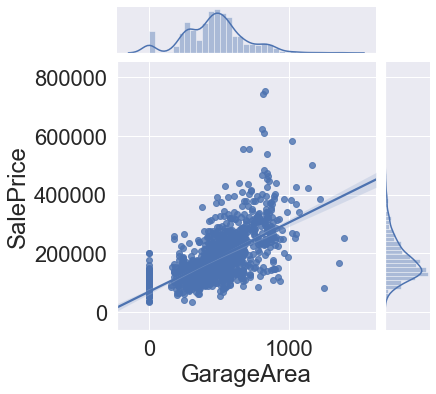

In [27]:
#  ========================================================================================================
#  =                                       Garage Area vs Sale Price                                      =
#  ========================================================================================================

sns.jointplot(x=df['GarageArea'], y=df['SalePrice'], kind='reg')

In [28]:
#  ========================================================================================================
#  =                                           Removing Outliers                                          =
#  ========================================================================================================

df = df.drop(df[(df['GarageArea']>1000) 
                         & (df['SalePrice']<300000)].index).reset_index(drop=True)

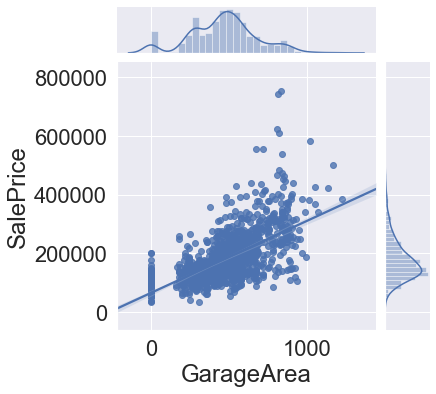

In [29]:
sns.jointplot(x=df['GarageArea'], y=df['SalePrice'], kind='reg')

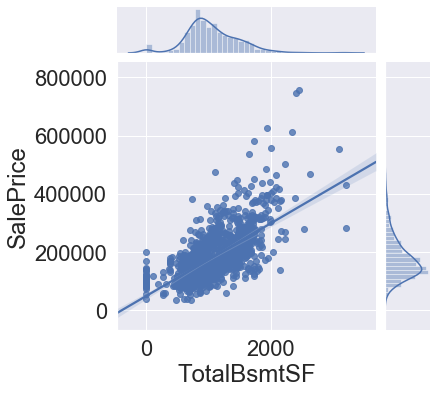

In [30]:
#  ========================================================================================================
#  =                                   Total Basement Area vs Sale Price                                  =
#  ========================================================================================================
sns.jointplot(x=df['TotalBsmtSF'], y=df['SalePrice'], kind='reg')

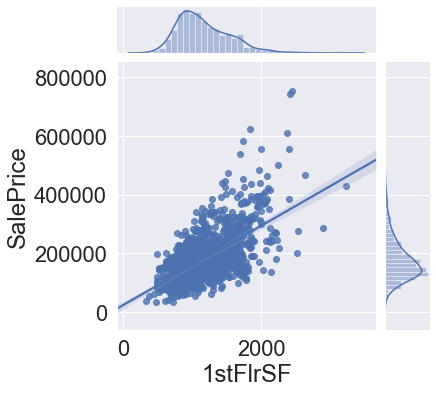

In [31]:
#  ========================================================================================================
#  =                                     First Floor Area vs Sale Price                                   =
#  ========================================================================================================
sns.jointplot(x=df['1stFlrSF'], y=df['SalePrice'], kind='reg')

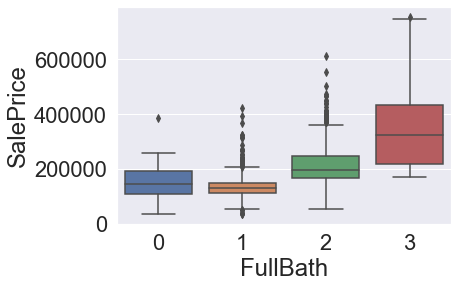

In [32]:
#  ========================================================================================================
#  =                                         Total Bath vs Sale Price                                     =
#  ========================================================================================================
sns.boxplot(x=df['FullBath'], y=df['SalePrice'])

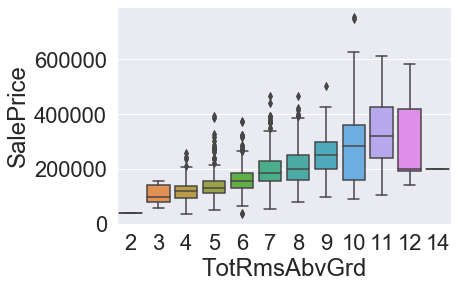

In [33]:
#  ========================================================================================================
#  =                                         Total Rooms vs Sale Price                                     =
#  ========================================================================================================
sns.boxplot(x=df['TotRmsAbvGrd'], y=df['SalePrice'])

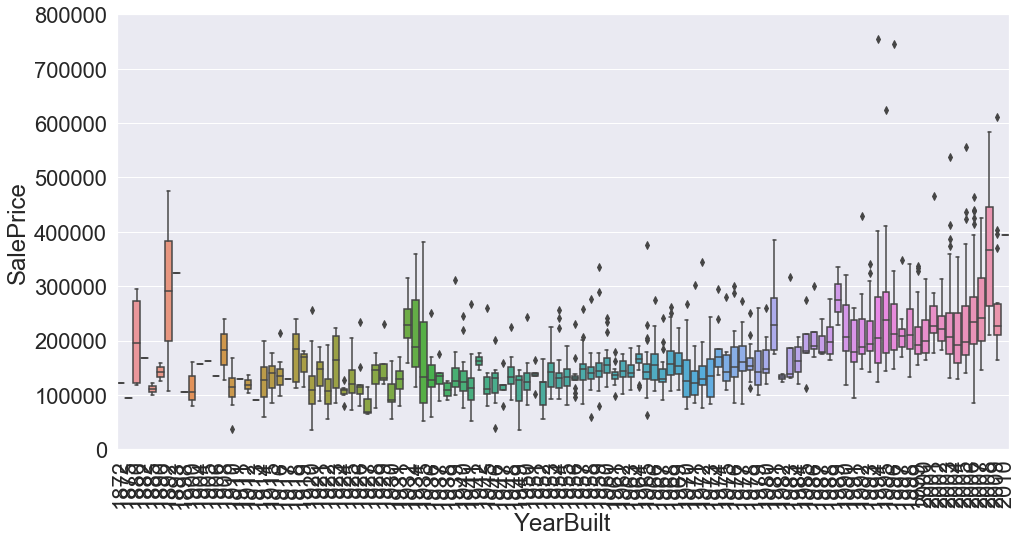

In [34]:
#  ========================================================================================================
#  =                                         Year Built vs Sale Price                                     =
#  ========================================================================================================
var = 'YearBuilt'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

In [35]:
# Find Missing Ratio of Dataset
def findMissingData(df):
    missing_data = df.isnull().sum()/len(df)*100
    missing_data = missing_data[missing_data>0]
    missing_data.sort_values(inplace=True, ascending=False)
    return(missing_data)

missing_data = findMissingData(df)
missing_data




PoolQC          99.586777
MiscFeature     96.349862
Alley           93.732782
Fence           80.647383
FireplaceQu     47.451791
LotFrontage     17.768595
GarageYrBlt      5.578512
GarageType       5.578512
GarageFinish     5.578512
GarageQual       5.578512
GarageCond       5.578512
BsmtFinType2     2.617080
BsmtExposure     2.617080
BsmtFinType1     2.548209
BsmtCond         2.548209
BsmtQual         2.548209
MasVnrArea       0.550964
MasVnrType       0.550964
Electrical       0.068871
dtype: float64

In [36]:
missing_data = missing_data.to_frame()
missing_data.columns = ['count']
missing_data.index.names = ['Name']
missing_data['Name'] = missing_data.index

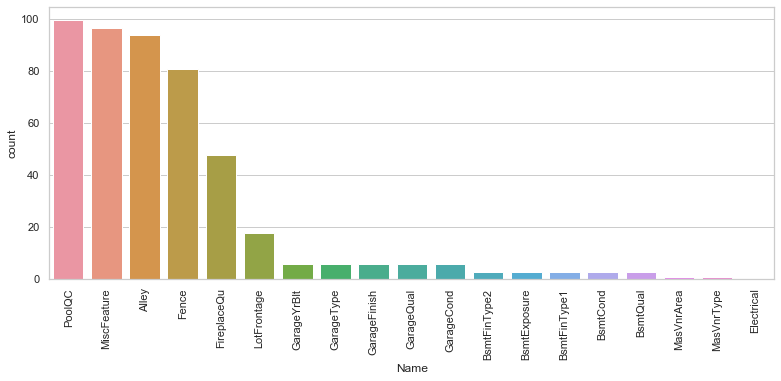

In [37]:
#plot Missing values
plt.figure(figsize=(13, 5))
sns.set(style='whitegrid')
sns.barplot(x='Name', y='count', data=missing_data)
plt.xticks(rotation = 90)
plt.show()

In [38]:
def removeMissingData(df):
    
    df["PoolQC"] = df["PoolQC"].fillna("None")
    df["MiscFeature"] = df["MiscFeature"].fillna("None")
    df["Alley"] = df["Alley"].fillna("None")
    df["Fence"] = df["Fence"].fillna("None")
    df["FireplaceQu"] = df["FireplaceQu"].fillna("None")  
    df["MasVnrType"] = df["MasVnrType"].fillna("None")
    df["MasVnrArea"] = df["MasVnrArea"].fillna(0)
    df['MSZoning'] = df['MSZoning'].fillna(df['MSZoning'].mode()[0])
    df = df.drop(['Utilities'], axis=1)
    df["Functional"] = df["Functional"].fillna("Typ")
    df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])
    df['Exterior1st'] = df['Exterior1st'].fillna(df['Exterior1st'].mode()[0])
    df['Exterior2nd'] = df['Exterior2nd'].fillna(df['Exterior2nd'].mode()[0])
    df['SaleType'] = df['SaleType'].fillna(df['SaleType'].mode()[0])
    df['MSSubClass'] = df['MSSubClass'].fillna("None")

removeMissingData(df)

In [39]:
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])
df["LotFrontage"] = df.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    df[col] = df[col].fillna('None')
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    df[col] = df[col].fillna(0)
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    df[col] = df[col].fillna(0)
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    df[col] = df[col].fillna('None')

In [40]:
# Find Missing Ratio of Dataset
def findMissingData(df):
    df_na = (df.isnull().sum() / len(df)) * 100
    df_na = df_na.drop(df_na[df_na == 0].index).sort_values(ascending=False)[:30]
    missing_data = pd.DataFrame({'Missing Ratio' :df_na})
    return(missing_data)

missing_data = findMissingData(df)
missing_data

,Missing Ratio


In [41]:
#  ========================================================================================================
#  =                                         FIXING SKEWNESS IN DATA                                      =
#  ========================================================================================================

In [42]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,...,0,None,None,None,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1447,60,RL,62.0,7917,Pave,None,Reg,Lvl,AllPub,Inside,...,0,None,None,None,0,8,2007,WD,Normal,175000
1448,20,RL,85.0,13175,Pave,None,Reg,Lvl,AllPub,Inside,...,0,None,MnPrv,None,0,2,2010,WD,Normal,210000
1449,70,RL,66.0,9042,Pave,None,Reg,Lvl,AllPub,Inside,...,0,None,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1450,20,RL,68.0,9717,Pave,None,Reg,Lvl,AllPub,Inside,...,0,None,None,None,0,4,2010,WD,Normal,142125



 mu = 12.02 and sigma = 0.40



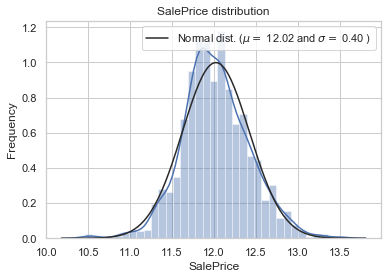

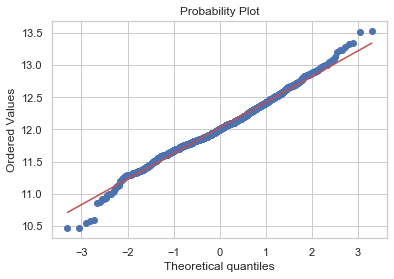

Skewness: 0.121347
Kurtosis: 0.809519


In [43]:
# We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
df_t["SalePrice"] = np.log1p(df_t["SalePrice"])

#Check the new distribution 
sns.distplot(df_t['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df_t['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

fig = plt.figure()
res = stats.probplot(df_t['SalePrice'], plot=plt)
plt.show()

y_train = df_t.SalePrice.values

print("Skewness: %f" % df_t['SalePrice'].skew())
print("Kurtosis: %f" % df_t['SalePrice'].kurt())

In [44]:
#  ========================================================================================================
#  =                                              LINEAR ENCODING                                         =
#  ========================================================================================================


In [45]:
categorialCols = ('MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition')

In [46]:
def linearEncoder(categorialCols):
    for c in categorialCols:
        print("Values before Transformation ",df[c].values)
        lbl = LabelEncoder() 
        lbl.fit(list(df[c].values)) 
        df[c] = lbl.transform(list(df[c].values))
        print("Values After Transformation ",df[c].values)
        print("=================================================")
    

linearEncoder(categorialCols)


Values before Transformation  ['RL' 'RL' 'RL' ... 'RL' 'RL' 'RL']
Values After Transformation  [3 3 3 ... 3 3 3]
Values before Transformation  ['Pave' 'Pave' 'Pave' ... 'Pave' 'Pave' 'Pave']
Values After Transformation  [1 1 1 ... 1 1 1]
Values before Transformation  ['None' 'None' 'None' ... 'None' 'None' 'None']
Values After Transformation  [1 1 1 ... 1 1 1]
Values before Transformation  ['Reg' 'Reg' 'IR1' ... 'Reg' 'Reg' 'Reg']
Values After Transformation  [3 3 0 ... 3 3 3]
Values before Transformation  ['Lvl' 'Lvl' 'Lvl' ... 'Lvl' 'Lvl' 'Lvl']
Values After Transformation  [3 3 3 ... 3 3 3]
Values before Transformation  ['AllPub' 'AllPub' 'AllPub' ... 'AllPub' 'AllPub' 'AllPub']
Values After Transformation  [0 0 0 ... 0 0 0]
Values before Transformation  ['Inside' 'FR2' 'Inside' ... 'Inside' 'Inside' 'Inside']
Values After Transformation  [4 2 4 ... 4 4 4]
Values before Transformation  ['Gtl' 'Gtl' 'Gtl' ... 'Gtl' 'Gtl' 'Gtl']
Values After Transformation  [0 0 0 ... 0 0 0]
Values be

In [47]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,65.0,8450,1,1,3,3,0,4,...,0,3,4,1,0,2,2008,8,4,208500
1,20,3,80.0,9600,1,1,3,3,0,2,...,0,3,4,1,0,5,2007,8,4,181500
2,60,3,68.0,11250,1,1,0,3,0,4,...,0,3,4,1,0,9,2008,8,4,223500
3,70,3,60.0,9550,1,1,0,3,0,0,...,0,3,4,1,0,2,2006,8,0,140000
4,60,3,84.0,14260,1,1,0,3,0,2,...,0,3,4,1,0,12,2008,8,4,250000


In [48]:
df_t.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,12.247699
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,12.109016
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,12.317171
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,11.849405
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,12.429220


In [49]:
#Take targate variable into y
y = df['SalePrice']

In [50]:
#Delete the saleprice
del df['SalePrice']

In [51]:
#Take their values in X and y
X = df.values
y = y.values

In [52]:
# Split data into train and test formate
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=7)

In [53]:
X_test.shape

(1162, 79)

In [54]:
#  ========================================================================================================
#  =                                       Writng the differences to a file                               =
#  ========================================================================================================
def fileWriter(regressor,model,X_test):
    print("Actual Value","\t","Predicted Value","\t","Accuracy (%)")
    header = "Actual Value" + "," + "Predicted Value" + "," +  "Accuracy (%)"
    name = 'FinalPrediction_'+ regressor + '.csv'
    f = open(name,'w')
    f.write(header + '\n')
    for i in range(len(X_test)):
        temp = str(model.predict([X_test[i]]))
        temp = temp.replace("[","") 
        temp = temp.replace("]","") 
        diffPercent = 100 - (abs((float(y_test[i]) - float(temp)) * 100) / float(y_test[i]))
        predicted_value = (str(y_test[i]) + "," + temp + "," + str(diffPercent))
        print(str(y_test[i]) + "\t" + "\t" + temp + "\t" + "\t" + str(diffPercent))
        f.write(predicted_value + '\n')
    f.close()


In [55]:
def sorterFunction(regressor):
    name = 'FinalPrediction_'+ regressor + '.csv'
    print(name)
    data = csv.reader(open(name),delimiter=',')
    sortedlist = sorted(reader, key=lambda row: row[3], reverse=True)

In [56]:
#  ========================================================================================================
#  =                                              Regression                                              =
#  ========================================================================================================

In [148]:
#  ==================================       LINEAR REGRESSION      ============================================
model_linear = linear_model.LinearRegression()


#  ==================================      RANDOM FOREST           ============================================
model_randomForest = RandomForestRegressor(n_estimators=1500)


#  ==================================      GRADIENT BOODST         ============================================
#model_GBR = GradientBoostingRegressor(n_estimators=100, max_depth=4)
model_GBR = GradientBoostingRegressor()

#  ==================================      ELASTIC NET             ============================================
model_eNET = ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3)


In [149]:
#  ========================================================================================================
#  =                                        FITTING THE MODEL                                             =
#  ========================================================================================================

In [150]:
model_linear.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [151]:
model_randomForest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1500,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [152]:
model_GBR.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [153]:
model_eNET.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 37504933717.107254, tolerance: 225782549.05836174
  positive)


ElasticNet(alpha=0.0005, copy_X=True, fit_intercept=True, l1_ratio=0.9,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=3, selection='cyclic', tol=0.0001, warm_start=False)

In [154]:
#  ========================================================================================================
#  =                                     PREDICTING THE VALUE                                             =
#  ========================================================================================================

In [155]:
print("=================================       LINEAR REGRESSION      ============================================")
temp = str(model_linear.predict([X_test[100]]))
temp = temp.replace("[","") 
temp = temp.replace("]","") 
print("Predict value " + temp)
print("Real value " + str(y_test[100]))
      
print("=================================      FOREST FOREST           ============================================")
temp = str(model_randomForest.predict([X_test[100]]))
temp = temp.replace("[","") 
temp = temp.replace("]","") 
print("Predict value " + temp)
print("Real value " + str(y_test[100]))

print("=================================      GRADIENT BOODST         ============================================")
temp = str(model_GBR.predict([X_test[100]]))
temp = temp.replace("[","") 
temp = temp.replace("]","") 
print("Predict value " + temp)
print("Real value " + str(y_test[100]))

print("=================================      ELASTIC NET             ============================================")
temp = str(model_eNET.predict([X_test[100]]))
temp = temp.replace("[","") 
temp = temp.replace("]","") 
print("Predict value " + temp)
print("Real value " + str(y_test[100]))

=================================       LINEAR REGRESSION      ============================================
Predict value 116435.68906724
Real value 125500
=================================      FOREST FOREST           ============================================
Predict value 116317.09666667
Real value 125500
=================================      GRADIENT BOODST         ============================================
Predict value 106777.13564418
Real value 125500
=================================      ELASTIC NET             ============================================
Predict value 116453.93843167
Real value 125500


In [164]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_value)
cm

NameError: name 'predicted_value' is not defined

Text(66.5, 0.5, 'Truth')

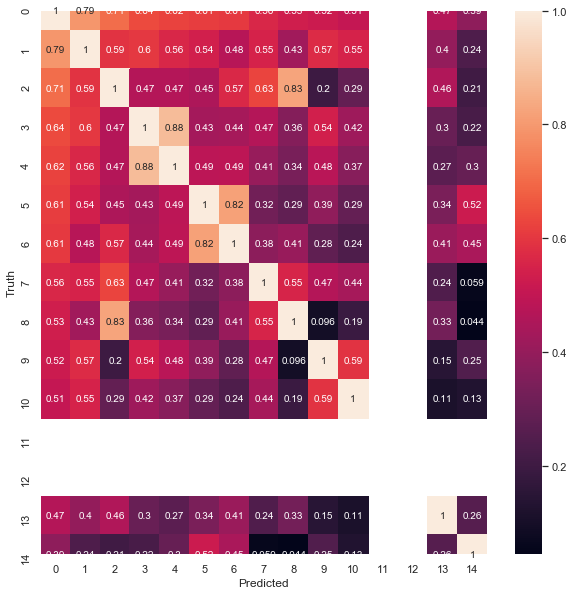

In [165]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,10))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [156]:
#  ========================================================================================================
#  =                                           MODEL ACCURACY                                            =
#  ========================================================================================================

In [157]:
print("=================================      LINEAR REGRESSION       ============================================")
print("Score --> ", model_linear.score(X, y)*100)
      
print("=================================      FOREST FOREST           ============================================")
print("Score --> ", model_randomForest.score(X_test, y_test)*100)

print("=================================      GRADIENT BOODST         ============================================")
print("Score --> ", model_GBR.score(X_test, y_test)*100)

print("=================================      ELASTIC NET             ============================================")
print("Score --> ", model_eNET.score(X_test, y_test)*100)


=================================      LINEAR REGRESSION       ============================================
Score -->  83.63962165880405
=================================      FOREST FOREST           ============================================
Score -->  87.83100982031303
=================================      GRADIENT BOODST         ============================================
Score -->  88.9681323081406
=================================      ELASTIC NET             ============================================
Score -->  80.27052024585632


In [67]:
#  ========================================================================================================
#  =                  Writng the differences to a file for Linear Regression                              =
#  ========================================================================================================

fileWriter("LinearRegression",model_linear,X_test)


Actual Value 	 Predicted Value 	 Accuracy (%)
173000		175239.40175119		98.70554812069943
150900		174998.09384126		84.03042157636845
173500		169324.35668216		97.59328915398271
246578		227938.88507844		92.44088486338603
227680		247906.58958006		91.11622031796381
214000		190120.38762687		88.8413026293785
154000		218934.14153779		57.834973027409085
95000		79114.94897033		83.27889365297895
64500		70014.67745611		91.45011247114728
171000		161300.48800465		94.32777076295321
153900		104693.29384629		68.02683160902535
185000		170517.26365526		92.17149386770811
318061		303052.45543029		95.28123706782347
122000		119467.25874658		97.92398257916393
159000		214087.81870181		65.35357314351572
167900		189286.31658368		87.26246778815963
139000		138733.1608968		99.80802942215827
160000		87546.05870959		54.71628669349375
277000		329428.17116701		81.07286239458124
145500		137277.05951856		94.34849451447424
173000		166767.03360389		96.39712925080347
145000		160068.33858777		89.60804235326206
239000		224600

130000		198442.0043854		47.35230431892307
132500		143598.43810074		91.62382030132831
136500		154157.36482242		87.06420159529671
160000		168542.15494295		94.66115316065626
143000		136022.95044007		95.12094436368533
119000		103428.82003775		86.91497482163865
208900		221184.51823937		94.11942640528004
201000		221389.85772347		89.85579217737812
87000		100749.32410147		84.19617919371264
274300		277509.79842682		98.82982193699598
169000		198842.37997744		82.34178699559763
290000		322711.3509316		88.72022381668964
271000		248668.93233898		91.75975363061993
466500		454982.56742188		97.53109698218222
124500		128302.92915756		96.94543842766265
98000		72506.98245622		73.98671679206122
250000		272243.52386356		91.102590454576
128500		8862.52891131		6.896909658607015
158000		179981.6722267		86.0875492236076
140000		139791.14608242		99.8508186303
218000		223004.3187229		97.70444095279817
91300		127231.824953		60.64422239539977
143500		175655.96273445		77.59166359968641
189000		204910.58571732		91.58

234000		202560.17999719		86.56417948597863
120000		101386.65428781		84.488878573175
174000		198237.5354099		86.07038194833333
117000		129619.14715797		89.21440413848718
269500		225597.65934819		83.70970662270501
177000		186007.20434468		94.91118398605649
301500		338125.35834189		87.85228579041792
115000		96075.37385716		83.54380335405217
162500		163869.37584859		99.15730717009846
225000		236948.99234964		94.68933673349333
194000		183907.08079719		94.79746432844846
93500		46948.15314455		50.21192849684492
271000		275994.93329638		98.1568511821476
169500		171202.85583222		98.99536529072567
179665		198575.20083763		89.47474419746194
164990		189460.81975413		85.16830125817928
124900		153524.29990642		77.08222585554844
402861		367340.95480556		91.18305192251421
200141		195462.7130756		97.66250447214715
173000		217199.79754755		74.4509840765607
145000		143227.04290309		98.77727096764828
386250		398067.2415276		96.94051999285438
122000		92272.85243031		75.63348559861475
80500		71092.21583864	

248000		238926.22906127		96.34122139567339
153500		223103.22569001		54.655879029309446
254000		208626.14644927		82.13627812963385
132500		142445.76117619		92.49376515004529
126175		119002.04852353		94.3150770941391
125000		105453.99064487		84.363192515896
208300		169683.59111665		81.46115752119539
125500		142843.64421707		86.18036317364941
180000		279967.7312139		44.462371547833314
131500		84820.1142598		64.50198803026616
278000		256278.87015685		92.18664394131295
135000		107522.88355268		79.64658040939258
149350		146396.42380684		98.02237951579511
175000		166052.66291823		94.88723595327428
142000		114471.39820528		80.61366070794367
60000		72266.15746452		79.5564042258
179600		191346.33694411		93.45972330506125
219500		269376.54468797		77.27720059773576
231500		215989.33135738		93.29992715221599
171900		160902.40120131		93.60232763310646
245350		255003.75074931		96.06531455092316
127000		120657.32064057		95.0057642839134
155000		158222.0625679		97.92124995619355
87000		99748.77030762		

224900		217734.9314479		96.81410913646064
165000		177363.2565959		92.50711721460607
168500		106827.92563755		63.39936239617211
124000		136655.47897959		89.79396856484678
144500		148267.23468525		97.39291717283737
231500		214559.0639343		92.68210105153348
135000		220902.64236039		36.368413066377784
166000		203954.38163573		77.13591467727107
216500		223925.94412831		96.57000271209701
174000		192468.79927455		89.38574754336207
67000		65698.85456269		98.05799188461194
140000		142786.33148686		98.00976322367143
213000		190781.89119119		89.56896300055868
239000		281264.91836927		82.31593373670712
114504		146757.40303936		71.83207308097533
140200		154698.84626822		89.6584548728816
144000		153845.11880305		93.1631119423264
167000		253730.06428693		48.0658297683054
159000		169619.42809022		93.32111440866667
501837		467979.42430853		93.25327233913202
137500		149174.02094365		91.50980295007274
82000		28061.38814519		34.22120505510976
157000		144127.79562418		91.80114370966879
184100		183492.51283

In [93]:
#  ========================================================================================================
#  =                      Writng the differences to a file for Random Forest                              =
#  ========================================================================================================

fileWriter("RandomForest",model_randomForest,X_test)

Actual Value 	 Predicted Value 	 Accuracy (%)
173000		189942.		90.20693641618497
150900		166946.28		89.36628230616301
173500		170432.33		98.23189048991354
246578		222012.54		90.03744859638735
227680		210469.17		92.44078092059031
214000		214175.37		99.91805140186916
154000		184158.37		80.41664285714286
95000		144929.79		47.442326315789465
64500		103235.69		39.94466666666667
171000		160183.78		93.67472514619882
153900		154510.66		99.6032098765432
185000		164470.07		88.90274054054055
318061		300293.09		94.4136785082107
122000		206849.7		30.451065573770478
159000		175557.55		89.58644654088052
167900		168222.39		99.80798689696248
139000		136405.28		98.13329496402878
160000		131574.37		82.23398125
277000		220179.85		79.48731046931408
145500		140205.6		96.36123711340207
173000		163461.35		94.48632947976878
145000		161680.		88.49655172413793
239000		262449.34		90.18856066945605
134432		157989.84		82.47601761485362
175000		152229.		86.988
180000		162082.		90.04555555555555
129500		128061.6		98.

274300		254813.95		92.89608093328474
169000		181737.28		92.46314792899409
290000		285652.7		98.50093103448276
271000		291275.2		92.51837638376384
466500		392291.38		84.09247159699893
124500		139357.6		88.06618473895583
98000		114801.26		82.85585714285715
250000		273657.65		90.53693999999999
128500		134109.09		95.63494941634241
158000		162151.66		97.37236708860759
140000		138502.07		98.93005000000001
218000		166849.9		76.53665137614678
91300		102941.37		87.24932092004381
143500		142735.85		99.4674912891986
189000		206675.		90.64814814814815
286000		255302.95		89.26676573426573
145250		149795.1		96.87084337349397
167900		167042.		99.48898153662894
127000		135558.41		93.26109448818897
141000		132937.01		94.28156737588654
228000		242549.89		93.61846929824561
178740		195343.		90.71108873223677
119000		116450.93		97.85792436974789
192000		204916.9		93.27244791666666
110000		165297.19		49.72982727272727
207500		234802.75		86.84204819277109
335000		279897.5		83.55149253731344
124000		126855.63

281000		263233.73		93.67748398576512
167000		145215.13		86.95516766467065
133000		126158.83		94.85626315789474
140000		149872.47		92.94823571428572
109900		112491.65		97.64181073703367
110000		109390.38		99.4458
133000		154014.		84.2
134800		132135.85		98.02362759643917
126000		129737.05		97.0340873015873
156000		142732.75		91.49535256410256
192000		225761.47		82.41590104166667
145000		144076.94		99.36340689655172
262500		249334.73		94.98465904761905
140000		201172.5		56.30535714285714
129900		138365.2		93.48329484218628
137500		189678.87		62.05173090909091
160000		155054.65		96.90915625
437154		449577.12		97.15818224241343
111250		132817.47		80.61351011235955
255000		245245.89		96.17485882352942
100000		115658.16		84.34183999999999
85500		82695.1		96.71941520467837
290000		308981.79		93.4545551724138
119500		127967.85		92.9139330543933
160000		140195.		87.621875
394617		342712.76		86.84693259540263
290000		311711.		92.51344827586207
187750		205019.06		90.80209853528629
157500		147575.

139000		150840.03		91.4819928057554
112000		130303.44		83.65764285714286
127000		133870.27		94.59033858267718
148500		137030.4		92.27636363636363
383970		320227.65		83.39913274474569
100000		104906.		95.094
82500		117755.36		57.266230303030305
225000		233525.64		96.21082666666666
139000		145361.45		95.42341726618704
142000		130136.41		91.64535915492958
155900		141806.4		90.95984605516357
135500		133735.68		98.69791881918819
155000		163460.28		94.54175483870968
176500		174462.17		98.8454220963173
151000		147183.6		97.47258278145696
303477		316095.23		95.84211324087164
152000		148855.59		97.93130921052631
280000		231970.47		82.84659642857143
285000		298129.31		95.39322456140351
89000		102913.86		84.36644943820225
35311		88326.65		-50.139191753278
193500		205460.35		93.81894056847545
177000		153184.93		86.54515819209038
285000		315040.48		89.45948070175439
134450		139468.6		96.26731126812942
142953		135498.05		94.7850342420236
40000		103555.94		-58.889849999999996
79000		110582.89		60.021

141000		143111.03		98.50281560283688
180500		165843.85		91.88024930747923
149900		136756.05		91.23152101400933
485000		396194.17		81.68951958762887
88000		112733.		71.89431818181818
280000		284051.13		98.55316785714285
167240		191478.		85.50705572829466
125500		121724.93		96.99197609561753
272000		236604.74		86.98703676470588
239799		233257.47		97.27207786521211
426000		358093.1		84.0594131455399
305900		317591.		96.1781627983001
106500		106725.52		99.7882441314554
165000		164650.33		99.78807878787877
140000		164017.75		82.84446428571428
130000		189304.87		54.38086923076923
89500		100819.		87.35307262569833
195000		218889.54		87.74895384615384
138500		129081.52		93.19965342960289
155000		192660.09		75.70316774193549
142600		136082.14		95.42927068723704
139000		133727.25		96.20665467625899
179900		155202.43		86.27150083379655
149000		186509.75		74.82567114093959
134000		130784.34		97.60025373134329
171000		174272.4		98.08631578947369
100000		128160.74		71.83926
190000		198714.9		95.4132

In [69]:
#  ========================================================================================================
#  =                  Writng the differences to a file for Gradient Boost                                 =
#  ========================================================================================================

fileWriter("GragientBoostRegression",model_GBR,X_test)


Actual Value 	 Predicted Value 	 Accuracy (%)
173000		189889.8339856		90.2370901817341
150900		172473.68852618		85.70332105620942
173500		164718.59065312		94.93866896433428
246578		230662.95577824		93.54563496266496
227680		212137.4517422		93.17351183336261
214000		204514.27246306		95.56741703881309
154000		194421.57696817		73.75222274794156
95000		139258.50992138		53.4120948196
64500		105561.70579352		36.33844063020155
171000		158040.93324376		92.42159838816374
153900		149388.72283197		97.06869579725145
185000		165025.91919808		89.20319956652972
318061		305775.57416526		96.13739948162774
122000		161900.04471677		67.29504531412294
159000		176990.84339976		88.68500415109435
167900		176470.94414418		94.8952089671352
139000		131671.74224009		94.72787211517267
160000		124045.34491926		77.5283405745375
277000		252223.32424644		91.05535171351625
145500		142297.62711801		97.79905643849483
173000		168764.42991006		97.55169358963005
145000		159830.46388261		89.77209387406207
239000		269489.8120

132000		115373.06964755		87.40384064208334
235000		230417.22303429		98.04988214225106
119900		111181.4790679		92.7285063118432
281213		302333.28876209		92.489575957694
372402		317557.99413963		85.27290243866305
306000		293636.66775139		95.9596953435915
310000		342657.94351416		89.46517951156129
118000		110589.92037145		93.72027150122882
221000		211228.0353204		95.57829652506787
127000		137803.09948775		91.49362245059055
125000		119527.49373439		95.621994987512
177500		174715.4775118		98.43125493622536
115000		132096.94468505		85.1330915782174
115000		110779.91586984		96.33036162594783
217000		184057.28346865		84.81902463993089
139600		143602.44459427		97.1329193450788
95000		85522.22770276		90.02339758185263
212000		215580.05210841		98.3112961752783
110500		95043.23479355		86.01197718873303
156500		145168.70762161		92.75955758569329
145000		158702.53897863		90.5499731181862
147000		147687.44643132		99.53234936644898
179000		184215.65804465		97.08622455606147
130000		132171.67210583		98

160000		139652.09829534		87.28256143458749
394617		376528.1168504		95.41609126074142
290000		314043.82560366		91.70902565391034
187750		191035.77635035		98.24991938729694
157500		141692.44790139		89.96345898500952
148000		145035.93510834		97.99725345158107
181000		194294.1076178		92.65518916143645
153500		141812.00185185		92.38566895885992
135000		145958.83297839		91.88234594193332
109500		96211.9212096		87.8647682279452
124500		121149.8229571		97.30909474465864
86000		97267.58736998		86.89815422095349
403000		322254.19595106		79.96382033525062
222500		228800.43483849		97.16834389281348
240000		233783.32832616		97.4097201359
325624		326489.05664146		99.7343387952178
144000		141883.15380971		98.52996792340971
185000		197920.17856779		93.0161196930865
244000		346637.02106002		57.93564710654917
582933		399678.14714077		68.56330781423766
325000		314133.71299156		96.65652707432615
215000		196611.18500398		91.44706279254883
226000		218567.40169274		96.7112396870531
183500		200305.53324138		9

248000		218583.65200454		88.13856935666935
153500		179792.31947461		82.87145311100325
254000		222241.26907348		87.49656262735434
132500		128388.96269796		96.89733033808302
126175		128729.71696165		97.97525899611651
125000		109135.43398532		87.30834718825601
208300		189844.34719183		91.13986903112337
125500		124947.42250159		99.55969920445419
180000		284217.53938501		42.10136700832776
131500		139837.28603704		93.65985852696578
278000		244365.20148895		87.90115161473021
135000		130714.90042082		96.82585216357037
149350		141021.17413365		94.42328365159022
175000		149828.23906054		85.61613660602286
142000		131833.40712111		92.84042755007746
60000		67422.28628775		87.62952285375
179600		191200.8539762		93.54072718474389
219500		247011.65222292		87.46621766609567
231500		196686.13522783		84.96161348934342
171900		168356.96187408		97.9388957964398
245350		269866.31329038		90.0076163479193
127000		115527.35874954		90.96642421223622
155000		138139.40815945		89.12219881254838
87000		113687.68753

155000		153134.55270167		98.79648561398065
157900		161126.94635914		97.95633542803039
261500		257033.83206001		98.29209639006119
201800		193943.87253081		96.10697350387018
148500		147282.86338322		99.18037938263974
145000		162567.49031327		87.88448943912412
143000		197814.03274773		61.66850856802098
198900		217505.93299525		90.64558421556058
155000		160033.04256606		96.75287576383226
170000		175704.53067811		96.64439371875883
135000		126199.44014146		93.48106677145185
268000		281240.87178868		95.05937619825374
176000		187334.78041907		93.55978385280113
158000		162627.41974915		97.0712533233228


In [70]:
#  ========================================================================================================
#  =                      Writng the differences to a file for Elastic NET                                =
#  ========================================================================================================

fileWriter("ElasticNetRegression",model_eNET,X_test)


Actual Value 	 Predicted Value 	 Accuracy (%)
173000		175408.81084406		98.60762378956069
150900		175250.28094662		83.86329957149104
173500		169278.355662		97.56677559769452
246578		227892.41595459		92.42203925516063
227680		247980.38562053		91.08380814277496
214000		190108.96174472		88.83596343211215
154000		218988.74342613		57.79951725575974
95000		79528.98980063		83.71472610592633
64500		70387.61834239		90.87190954668218
171000		161253.31082876		94.30018177120468
153900		104684.28041178		68.02097492643274
185000		169673.22833182		91.71525855774054
318061		303033.90535743		95.27540483034072
122000		119040.98542853		97.57457822010656
159000		214048.10062802		65.37855306413836
167900		189157.39739995		87.33925110187613
139000		138691.85242982		99.77831110058992
160000		87678.10736032		54.798817100200004
277000		328926.92479817		81.25381776239351
145500		137300.03609874		94.36428597851547
173000		166741.27474425		96.38223973656069
145000		159894.65297205		89.72782553651723
239000		224522

132500		143516.41486643		91.68572462910944
136500		154107.70083191		87.1005854711282
160000		168400.17967661		94.74988770211876
143000		136106.67614005		95.17949380423076
119000		103797.92680083		87.22514857212605
208900		221239.86632133		94.09293139237435
201000		221526.79850201		89.78766243681095
87000		100564.33736621		84.40880762504597
274300		277600.73598467		98.79666934572731
169000		198839.74579954		82.34334568074557
290000		322718.61270988		88.71771975521379
271000		248657.60551031		91.75557398904428
466500		454925.04675744		97.51876672185209
124500		128318.66218582		96.9328014571727
98000		72216.20638854		73.69000651891837
250000		272155.26089521		91.13789564191599
128500		8953.61396583		6.967792969517518
158000		180039.13541679		86.0511801159557
140000		139625.91263967		99.73279474262142
218000		222886.71670373		97.75838683315138
91300		127030.71509402		60.86449606350494
143500		175713.59882363		77.55149907760976
189000		204871.93691317		91.60214978139153
286000		284815.28860

310000		328269.1284199		94.10673276777419
132000		131350.3338222		99.5078286531818
205000		237100.31891443		84.34130784661951
256300		280848.67463399		90.42189830901678
179900		173718.13473076		96.56372136229017
250580		208325.20433503		83.13720342207279
250000		288854.29135885		84.45828345646
165000		152070.83788028		92.16414416986667
202665		214646.53390178		94.08801031170651
244000		226110.5414748		92.66825470278688
37900		42418.52202197		88.07777830614776
313000		299752.42828231		95.76754897198403
164900		134279.11721716		81.4306350619527
175000		180712.31842632		96.73581804210285
91000		106785.38959991		82.65341802207692
145000		132247.54126211		91.20520087042068
169000		206324.74536786		77.91435185333728
196500		198795.94604089		98.83157962295674
311872		333272.10474164		93.13817696310025
271900		305935.97940408		87.48217013457888
269790		252792.94013836		93.6998925602728
233000		232311.60463641		99.70455134609871
89471		160035.16820269		21.131798903901824
174000		184835.54529721

116500		131696.21569946		86.95603802621459
197000		215759.69342302		90.47731298323858
132250		125847.71292063		95.15895116871833
133000		107406.16052148		80.7565116702857
251000		270519.94022763		92.22313138341433
147400		136061.49533905		92.30766305227272
325000		289651.06725549		89.12340530938154
72500		67938.0950017		93.70771724372413
156000		164697.88620487		94.42443191995513
119000		116414.23720664		97.82709008961345
230000		248658.2676079		91.88770973569565
162000		188871.82807778		83.4124518038395
181000		195661.23722981		91.89986893380663
135000		159163.46751374		82.1011351750074
142500		112467.38877862		78.92448335341754
147000		143263.84674987		97.45839914957142
148000		125946.32425054		85.09886773685135
120500		103625.61452297		85.9963605999751
189000		198227.17916797		95.11789462012169
210000		278940.92568938		67.17098776696191
166000		108688.18109676		65.47480788961445
177000		168823.83389366		95.38069711506215
315000		327780.54580959		95.94268386997142
118400		137269.3188

127500		126564.94353245		99.26662237839216
140000		191905.32862792		62.92476526577142
136000		125903.4417257		92.57606009242647
305000		319068.87540194		95.38725396657705
125000		94093.34249895		75.27467399916
129000		94440.6916122		73.20983845906977
242000		266544.73466311		89.8575476598719
212900		213922.48872734		99.51973286644433
245000		257278.77737501		94.98825413264899
96500		69847.80610851		72.38114622643523
191000		178010.6676633		93.19930244151833
190000		199779.13738722		94.85308558567368
104900		102947.40144456		98.13860957536701
129500		142075.4708501		90.28921169876446
128000		136469.18193996		93.38345160940625
179900		197911.65897969		89.9879605449194
181134		197584.65273703		90.91796529805006
133000		156485.69178843		82.3415851214812
118000		101084.46348896		85.66479956691525
84500		138709.41298394		35.846848539715964
314813		300231.53836046		95.36821489597317
84900		103327.6311556		78.29489852108362
160000		162140.70394762		98.6620600327375
123600		130177.08855416		94.

In [71]:
df.to_csv("dft.csv")

In [72]:
#  ========================================================================================================
#  =                                           Using the Test Data                                        =
#  ========================================================================================================

In [73]:
df_test = pd.read_csv("test_OR.csv")
df_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [74]:
df_test = df_test.drop(['Id'], axis=1)
df_test

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [75]:
# Find Missing Ratio of Dataset
def findMissingData(df_test):
    missing_data = df_test.isnull().sum()/len(df_test)*100
    missing_data = missing_data[missing_data>0]
    missing_data.sort_values(inplace=True, ascending=False)
    return(missing_data)

missing_data = findMissingData(df_test)

In [76]:
def removeMissingData(df_test):
    
    df_test['PoolQC'].fillna('No Pool', inplace = True)
    df_test['MiscFeature'].fillna('None', inplace = True)
    df_test['Alley'].fillna('No alley access', inplace = True)
    df_test['Fence'].fillna('No Fence', inplace = True)
    df_test['FireplaceQu'].fillna('No Fireplace', inplace = True)
    df_test['GarageType'].fillna('No Garage', inplace = True)
    df_test['GarageCond'].fillna('No Garage', inplace = True)
    df_test['GarageFinish'].fillna('No Garage', inplace = True)
    df_test['GarageQual'].fillna('No Garage', inplace = True)
    df_test['BsmtFinType2'].fillna('No Basement', inplace = True)
    df_test['BsmtExposure'].fillna('No Basement', inplace = True)
    df_test['BsmtQual'].fillna('No Basement', inplace = True)
    df_test['BsmtCond'].fillna('No Basement', inplace = True)
    df_test['BsmtFinType1'].fillna('No Basement', inplace = True)
    df_test['MasVnrType'].fillna('None', inplace = True)
    df_test['Electrical'].fillna(value = 'SBrkr', inplace = True)  # Filling the NaN values with mode 'SBrkr'
    df_test['MasVnrArea'].fillna(0, inplace = True) # Filling the missing values with 0 as they do not have Mason Veneer
    df_test['GarageYrBlt'].fillna(df_test['YearBuilt'], inplace = True)
    df_test['LotFrontage'].fillna(0, inplace = True)
    df_test['MSZoning'].fillna('No MSZoning', inplace = True)
    df_test['Functional'].fillna('No Functional', inplace = True)
    df_test['BsmtHalfBath'].fillna(0, inplace = True)
    df_test['BsmtFullBath'].fillna(0, inplace = True)
    df_test['Utilities'].fillna('Utilities', inplace = True)
    df_test['SaleType'].fillna('No SaleType', inplace = True)
    df_test['GarageArea'].fillna(0, inplace = True)
    df_test['GarageCars'].fillna(0, inplace = True)
    df_test['KitchenQual'].fillna(0, inplace = True)
    df_test['TotalBsmtSF'].fillna(0, inplace = True)
    df_test['BsmtUnfSF'].fillna(0, inplace = True)
    df_test['BsmtFinSF1'].fillna(0, inplace = True)
    df_test['BsmtFinSF2'].fillna(0, inplace = True)
    df_test['Exterior1st'].fillna('No Exterior1st', inplace = True)
    df_test['Exterior2nd'].fillna('No Exterior2nd', inplace = True)
    df_test['KitchenQual'].fillna('No KitchenQual', inplace = True)
    df_test['TotalBsmtSF'].fillna(0, inplace = True)
    df_test['LotFrontage'].fillna(0, inplace = True)
    
removeMissingData(df_test)


In [77]:
def linearEncoder(categorialCols):
    for c in categorialCols:
        print("Values before Transformation ",df_test[c].values)
        lbl = LabelEncoder() 
        lbl.fit(list(df_test[c].values)) 
        df_test[c] = lbl.transform(list(df_test[c].values))
        print("Values After Transformation ",df_test[c].values)
        print("=================================================")
    

linearEncoder(categorialCols)

Values before Transformation  ['RH' 'RL' 'RL' ... 'RL' 'RL' 'RL']
Values After Transformation  [3 4 4 ... 4 4 4]
Values before Transformation  ['Pave' 'Pave' 'Pave' ... 'Pave' 'Pave' 'Pave']
Values After Transformation  [1 1 1 ... 1 1 1]
Values before Transformation  ['No alley access' 'No alley access' 'No alley access' ...
 'No alley access' 'No alley access' 'No alley access']
Values After Transformation  [1 1 1 ... 1 1 1]
Values before Transformation  ['Reg' 'IR1' 'IR1' ... 'Reg' 'Reg' 'Reg']
Values After Transformation  [3 0 0 ... 3 3 3]
Values before Transformation  ['Lvl' 'Lvl' 'Lvl' ... 'Lvl' 'Lvl' 'Lvl']
Values After Transformation  [3 3 3 ... 3 3 3]
Values before Transformation  ['AllPub' 'AllPub' 'AllPub' ... 'AllPub' 'AllPub' 'AllPub']
Values After Transformation  [0 0 0 ... 0 0 0]
Values before Transformation  ['Inside' 'Corner' 'Inside' ... 'Inside' 'Inside' 'Inside']
Values After Transformation  [4 0 4 ... 4 4 4]
Values before Transformation  ['Gtl' 'Gtl' 'Gtl' ... 'Gtl'

In [78]:
df_test.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,3,80.0,11622,1,1,3,3,0,4,...,120,0,2,2,1,0,6,2010,9,4
1,20,4,81.0,14267,1,1,0,3,0,0,...,0,0,2,4,0,12500,6,2010,9,4
2,60,4,74.0,13830,1,1,0,3,0,4,...,0,0,2,2,1,0,3,2010,9,4
3,60,4,78.0,9978,1,1,0,3,0,4,...,0,0,2,4,1,0,6,2010,9,4
4,120,4,43.0,5005,1,1,0,1,0,4,...,144,0,2,4,1,0,1,2010,9,4
5,60,4,75.0,10000,1,1,0,3,0,0,...,0,0,2,4,1,0,4,2010,9,4
6,20,4,0.0,7980,1,1,0,3,0,4,...,0,0,2,0,3,500,3,2010,9,4
7,60,4,63.0,8402,1,1,0,3,0,4,...,0,0,2,4,1,0,5,2010,9,4
8,20,4,85.0,10176,1,1,3,3,0,4,...,0,0,2,4,1,0,2,2010,9,4
9,20,4,70.0,8400,1,1,3,3,0,0,...,0,0,2,2,1,0,4,2010,9,4


In [79]:
TEST_DATA = df_test.values

In [80]:
TEST_DATA

array([[  20.,    3.,   80., ..., 2010.,    9.,    4.],
       [  20.,    4.,   81., ..., 2010.,    9.,    4.],
       [  60.,    4.,   74., ..., 2010.,    9.,    4.],
       ...,
       [  20.,    4.,  160., ..., 2006.,    9.,    0.],
       [  85.,    4.,   62., ..., 2006.,    9.,    4.],
       [  60.,    4.,   74., ..., 2006.,    9.,    4.]])

In [81]:
TEST_DATA.shape

(1459, 79)

In [82]:
def testFileWriter(regressor,model,X_test):
    print("Predicted Value")
    header = "Predicted Value"
    name = 'VINEET_Final_'+ regressor + '.csv'
    f = open(name,'w')
    f.write(header + '\n')
    for i in range(len(X_test)):
        temp = str(model.predict([X_test[i]]))
        temp = temp.replace("[","") 
        temp = temp.replace("]","") 
        predicted_value = str(temp)
        print(X_test[i],temp)
        f.write(predicted_value + '\n')
    f.close()

In [83]:
testFileWriter("GragientBoostRegression",model_GBR,TEST_DATA)

Predicted Value
[2.0000e+01 3.0000e+00 8.0000e+01 1.1622e+04 1.0000e+00 1.0000e+00
 3.0000e+00 3.0000e+00 0.0000e+00 4.0000e+00 0.0000e+00 1.2000e+01
 1.0000e+00 2.0000e+00 0.0000e+00 2.0000e+00 5.0000e+00 6.0000e+00
 1.9610e+03 1.9610e+03 1.0000e+00 0.0000e+00 1.1000e+01 1.3000e+01
 2.0000e+00 0.0000e+00 3.0000e+00 4.0000e+00 1.0000e+00 4.0000e+00
 4.0000e+00 3.0000e+00 5.0000e+00 4.6800e+02 3.0000e+00 1.4400e+02
 2.7000e+02 8.8200e+02 0.0000e+00 4.0000e+00 1.0000e+00 3.0000e+00
 8.9600e+02 0.0000e+00 0.0000e+00 8.9600e+02 0.0000e+00 0.0000e+00
 1.0000e+00 0.0000e+00 2.0000e+00 1.0000e+00 4.0000e+00 5.0000e+00
 7.0000e+00 0.0000e+00 3.0000e+00 1.0000e+00 1.9610e+03 3.0000e+00
 1.0000e+00 7.3000e+02 4.0000e+00 5.0000e+00 2.0000e+00 1.4000e+02
 0.0000e+00 0.0000e+00 0.0000e+00 1.2000e+02 0.0000e+00 2.0000e+00
 2.0000e+00 1.0000e+00 0.0000e+00 6.0000e+00 2.0100e+03 9.0000e+00
 4.0000e+00] 123958.5757812
[2.0000e+01 4.0000e+00 8.1000e+01 1.4267e+04 1.0000e+00 1.0000e+00
 0.0000e+00 3.0000

 9.000e+00 4.000e+00] 231882.71882551
[1.200e+02 5.000e+00 0.000e+00 4.435e+03 1.000e+00 1.000e+00 3.000e+00
 3.000e+00 0.000e+00 4.000e+00 0.000e+00 5.000e+00 2.000e+00 2.000e+00
 4.000e+00 2.000e+00 6.000e+00 5.000e+00 2.003e+03 2.003e+03 1.000e+00
 0.000e+00 1.100e+01 1.300e+01 1.000e+00 1.700e+02 2.000e+00 4.000e+00
 2.000e+00 2.000e+00 4.000e+00 0.000e+00 2.000e+00 6.720e+02 6.000e+00
 0.000e+00 1.760e+02 8.480e+02 0.000e+00 0.000e+00 1.000e+00 3.000e+00
 8.480e+02 0.000e+00 0.000e+00 8.480e+02 1.000e+00 0.000e+00 1.000e+00
 0.000e+00 1.000e+00 1.000e+00 3.000e+00 4.000e+00 7.000e+00 0.000e+00
 3.000e+00 1.000e+00 2.003e+03 0.000e+00 2.000e+00 4.200e+02 4.000e+00
 5.000e+00 2.000e+00 1.400e+02 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 2.000e+00 4.000e+00 1.000e+00 0.000e+00 4.000e+00 2.010e+03
 9.000e+00 4.000e+00] 144338.31978713
[3.000e+01 4.000e+00 6.700e+01 8.777e+03 1.000e+00 1.000e+00 3.000e+00
 3.000e+00 0.000e+00 4.000e+00 1.000e+00 7.000e+00 1.000e+00 2.000e+00
 

 4.0000e+00] 199640.56882464
[2.0000e+01 4.0000e+00 7.6000e+01 1.0141e+04 1.0000e+00 1.0000e+00
 0.0000e+00 3.0000e+00 0.0000e+00 4.0000e+00 0.0000e+00 2.0000e+01
 2.0000e+00 2.0000e+00 0.0000e+00 2.0000e+00 8.0000e+00 5.0000e+00
 2.0040e+03 2.0040e+03 1.0000e+00 1.0000e+00 1.1000e+01 1.3000e+01
 1.0000e+00 2.6400e+02 2.0000e+00 4.0000e+00 2.0000e+00 2.0000e+00
 4.0000e+00 1.0000e+00 1.0000e+00 5.1600e+02 5.0000e+00 7.7400e+02
 2.2200e+02 1.5120e+03 0.0000e+00 0.0000e+00 1.0000e+00 3.0000e+00
 1.5120e+03 0.0000e+00 0.0000e+00 1.5120e+03 0.0000e+00 0.0000e+00
 2.0000e+00 0.0000e+00 3.0000e+00 1.0000e+00 3.0000e+00 6.0000e+00
 7.0000e+00 0.0000e+00 3.0000e+00 1.0000e+00 2.0040e+03 2.0000e+00
 3.0000e+00 8.4500e+02 4.0000e+00 5.0000e+00 2.0000e+00 2.1000e+02
 3.6000e+01 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 2.0000e+00
 4.0000e+00 1.0000e+00 0.0000e+00 1.0000e+00 2.0090e+03 9.0000e+00
 4.0000e+00] 252614.67818926
[2.0000e+01 4.0000e+00 6.3000e+01 1.3072e+04 1.0000e+00 1.0000e+00
 3.0

 9.000e+00 4.000e+00] 165455.32557903
[3.000e+01 0.000e+00 7.200e+01 9.392e+03 1.000e+00 1.000e+00 3.000e+00
 3.000e+00 0.000e+00 0.000e+00 0.000e+00 9.000e+00 2.000e+00 2.000e+00
 0.000e+00 2.000e+00 3.000e+00 3.000e+00 1.900e+03 1.950e+03 4.000e+00
 0.000e+00 0.000e+00 0.000e+00 2.000e+00 0.000e+00 3.000e+00 1.000e+00
 1.000e+00 1.000e+00 4.000e+00 3.000e+00 6.000e+00 0.000e+00 6.000e+00
 0.000e+00 2.450e+02 2.450e+02 0.000e+00 4.000e+00 0.000e+00 3.000e+00
 7.970e+02 0.000e+00 0.000e+00 7.970e+02 0.000e+00 0.000e+00 1.000e+00
 0.000e+00 2.000e+00 1.000e+00 4.000e+00 5.000e+00 7.000e+00 0.000e+00
 3.000e+00 6.000e+00 1.900e+03 1.000e+00 0.000e+00 0.000e+00 2.000e+00
 3.000e+00 0.000e+00 0.000e+00 3.600e+01 9.400e+01 0.000e+00 0.000e+00
 0.000e+00 2.000e+00 4.000e+00 1.000e+00 0.000e+00 9.000e+00 2.009e+03
 9.000e+00 0.000e+00] 71700.58300654
[3.000e+01 4.000e+00 0.000e+00 6.615e+03 1.000e+00 1.000e+00 3.000e+00
 3.000e+00 0.000e+00 4.000e+00 0.000e+00 3.000e+00 2.000e+00 2.000e+00
 0

 0.000e+00 0.000e+00] 172117.20511686
[2.0000e+01 4.0000e+00 1.1300e+02 1.3438e+04 1.0000e+00 1.0000e+00
 0.0000e+00 1.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 2.3000e+01
 2.0000e+00 2.0000e+00 0.0000e+00 2.0000e+00 9.0000e+00 5.0000e+00
 2.0080e+03 2.0080e+03 1.0000e+00 0.0000e+00 5.0000e+00 5.0000e+00
 3.0000e+00 2.4600e+02 0.0000e+00 4.0000e+00 1.0000e+00 0.0000e+00
 4.0000e+00 1.0000e+00 2.0000e+00 1.7580e+03 6.0000e+00 0.0000e+00
 4.3200e+02 2.1900e+03 0.0000e+00 0.0000e+00 1.0000e+00 3.0000e+00
 2.0360e+03 0.0000e+00 0.0000e+00 2.0360e+03 1.0000e+00 0.0000e+00
 2.0000e+00 0.0000e+00 3.0000e+00 1.0000e+00 1.0000e+00 9.0000e+00
 7.0000e+00 1.0000e+00 0.0000e+00 1.0000e+00 2.0080e+03 0.0000e+00
 3.0000e+00 7.8000e+02 4.0000e+00 5.0000e+00 2.0000e+00 9.0000e+01
 1.5400e+02 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 2.0000e+00
 4.0000e+00 1.0000e+00 0.0000e+00 7.0000e+00 2.0090e+03 9.0000e+00
 4.0000e+00] 459354.12156845
[2.0000e+01 4.0000e+00 7.9000e+01 1.4463e+04 1.0000e+00 1.0000

 9.000e+00 4.000e+00] 185911.15245607
[1.600e+02 1.000e+00 2.400e+01 2.645e+03 1.000e+00 2.000e+00 3.000e+00
 3.000e+00 0.000e+00 4.000e+00 0.000e+00 2.100e+01 2.000e+00 2.000e+00
 3.000e+00 4.000e+00 8.000e+00 5.000e+00 1.999e+03 2.000e+03 1.000e+00
 0.000e+00 7.000e+00 8.000e+00 1.000e+00 4.560e+02 2.000e+00 4.000e+00
 2.000e+00 2.000e+00 4.000e+00 3.000e+00 2.000e+00 8.130e+02 6.000e+00
 0.000e+00 1.470e+02 9.600e+02 0.000e+00 0.000e+00 1.000e+00 3.000e+00
 9.620e+02 6.450e+02 0.000e+00 1.607e+03 1.000e+00 0.000e+00 2.000e+00
 1.000e+00 3.000e+00 1.000e+00 3.000e+00 7.000e+00 7.000e+00 0.000e+00
 3.000e+00 5.000e+00 2.000e+03 3.000e+00 2.000e+00 4.800e+02 4.000e+00
 5.000e+00 2.000e+00 1.690e+02 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 2.000e+00 4.000e+00 1.000e+00 0.000e+00 1.200e+01 2.008e+03
 3.000e+00 4.000e+00] 189960.56528016
[1.600e+02 1.000e+00 3.600e+01 3.951e+03 1.000e+00 2.000e+00 0.000e+00
 3.000e+00 0.000e+00 4.000e+00 0.000e+00 2.100e+01 2.000e+00 2.000e+00
 

 9.000e+00 4.000e+00] 116702.98292644
[8.500e+01 4.000e+00 0.000e+00 7.400e+03 1.000e+00 1.000e+00 0.000e+00
 3.000e+00 0.000e+00 1.000e+00 0.000e+00 1.900e+01 2.000e+00 2.000e+00
 0.000e+00 5.000e+00 5.000e+00 5.000e+00 1.984e+03 1.984e+03 1.000e+00
 0.000e+00 1.100e+01 1.300e+01 2.000e+00 0.000e+00 3.000e+00 4.000e+00
 2.000e+00 2.000e+00 4.000e+00 0.000e+00 3.000e+00 1.040e+02 0.000e+00
 9.560e+02 0.000e+00 1.060e+03 0.000e+00 4.000e+00 1.000e+00 3.000e+00
 1.126e+03 0.000e+00 0.000e+00 1.126e+03 1.000e+00 0.000e+00 1.000e+00
 0.000e+00 2.000e+00 1.000e+00 4.000e+00 5.000e+00 7.000e+00 0.000e+00
 3.000e+00 1.000e+00 1.984e+03 3.000e+00 2.000e+00 5.060e+02 4.000e+00
 5.000e+00 2.000e+00 1.780e+02 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 2.000e+00 4.000e+00 1.000e+00 0.000e+00 3.000e+00 2.008e+03
 9.000e+00 4.000e+00] 133941.65227302
[1.900e+02 4.000e+00 6.000e+01 1.290e+04 1.000e+00 1.000e+00 3.000e+00
 3.000e+00 0.000e+00 4.000e+00 0.000e+00 1.900e+01 1.000e+00 2.000e+00
 

 9.000e+00 4.000e+00] 128481.58197856
[1.600e+02 5.000e+00 4.100e+01 2.665e+03 1.000e+00 1.000e+00 3.000e+00
 3.000e+00 0.000e+00 4.000e+00 0.000e+00 1.000e+01 2.000e+00 2.000e+00
 4.000e+00 4.000e+00 5.000e+00 7.000e+00 1.976e+03 1.976e+03 1.000e+00
 0.000e+00 5.000e+00 5.000e+00 2.000e+00 0.000e+00 3.000e+00 4.000e+00
 2.000e+00 2.000e+00 4.000e+00 3.000e+00 0.000e+00 3.180e+02 6.000e+00
 0.000e+00 2.320e+02 5.500e+02 0.000e+00 4.000e+00 1.000e+00 3.000e+00
 9.250e+02 5.500e+02 0.000e+00 1.475e+03 0.000e+00 0.000e+00 2.000e+00
 0.000e+00 4.000e+00 1.000e+00 4.000e+00 6.000e+00 7.000e+00 1.000e+00
 5.000e+00 1.000e+00 1.976e+03 3.000e+00 1.000e+00 3.360e+02 4.000e+00
 5.000e+00 2.000e+00 9.200e+01 2.600e+01 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 2.000e+00 4.000e+00 1.000e+00 0.000e+00 5.000e+00 2.008e+03
 9.000e+00 4.000e+00] 117596.41267352
[1.800e+02 5.000e+00 2.100e+01 1.974e+03 1.000e+00 1.000e+00 3.000e+00
 3.000e+00 0.000e+00 4.000e+00 0.000e+00 1.000e+01 2.000e+00 2.000e+00
 

 9.000e+00 4.000e+00] 245292.03154513
[2.000e+01 1.000e+00 7.200e+01 8.640e+03 1.000e+00 1.000e+00 3.000e+00
 3.000e+00 0.000e+00 4.000e+00 0.000e+00 2.100e+01 2.000e+00 2.000e+00
 0.000e+00 2.000e+00 8.000e+00 5.000e+00 2.007e+03 2.007e+03 1.000e+00
 0.000e+00 1.100e+01 1.300e+01 2.000e+00 0.000e+00 2.000e+00 4.000e+00
 2.000e+00 2.000e+00 4.000e+00 3.000e+00 2.000e+00 2.400e+01 6.000e+00
 0.000e+00 1.314e+03 1.338e+03 0.000e+00 0.000e+00 1.000e+00 3.000e+00
 1.338e+03 0.000e+00 0.000e+00 1.338e+03 0.000e+00 0.000e+00 2.000e+00
 0.000e+00 3.000e+00 1.000e+00 3.000e+00 6.000e+00 7.000e+00 0.000e+00
 3.000e+00 1.000e+00 2.007e+03 2.000e+00 2.000e+00 5.980e+02 4.000e+00
 5.000e+00 2.000e+00 0.000e+00 1.410e+02 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 2.000e+00 4.000e+00 1.000e+00 0.000e+00 1.100e+01 2.007e+03
 6.000e+00 5.000e+00] 234292.07928703
[2.000e+01 1.000e+00 7.500e+01 9.000e+03 1.000e+00 1.000e+00 3.000e+00
 3.000e+00 0.000e+00 4.000e+00 0.000e+00 2.100e+01 2.000e+00 2.000e+00
 

 9.000e+00 4.000e+00] 135581.55766077
[5.000e+01 5.000e+00 5.100e+01 6.120e+03 1.000e+00 1.000e+00 3.000e+00
 3.000e+00 0.000e+00 4.000e+00 0.000e+00 3.000e+00 2.000e+00 2.000e+00
 0.000e+00 0.000e+00 5.000e+00 6.000e+00 1.926e+03 1.950e+03 1.000e+00
 0.000e+00 1.200e+01 1.400e+01 2.000e+00 0.000e+00 3.000e+00 4.000e+00
 0.000e+00 4.000e+00 4.000e+00 3.000e+00 0.000e+00 3.510e+02 6.000e+00
 0.000e+00 4.050e+02 7.560e+02 0.000e+00 2.000e+00 1.000e+00 0.000e+00
 9.030e+02 3.780e+02 0.000e+00 1.281e+03 1.000e+00 0.000e+00 1.000e+00
 0.000e+00 2.000e+00 1.000e+00 3.000e+00 6.000e+00 7.000e+00 0.000e+00
 3.000e+00 5.000e+00 1.926e+03 3.000e+00 2.000e+00 3.790e+02 4.000e+00
 5.000e+00 2.000e+00 2.500e+01 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 2.000e+00 4.000e+00 1.000e+00 0.000e+00 8.000e+00 2.007e+03
 9.000e+00 4.000e+00] 126678.80467408
[7.000e+01 5.000e+00 4.700e+01 7.755e+03 1.000e+00 1.000e+00 3.000e+00
 3.000e+00 0.000e+00 4.000e+00 0.000e+00 1.700e+01 2.000e+00 2.000e+00
 

 9.000e+00 4.000e+00] 181804.71927119
[6.000e+01 4.000e+00 6.400e+01 9.045e+03 1.000e+00 1.000e+00 0.000e+00
 3.000e+00 0.000e+00 4.000e+00 0.000e+00 5.000e+00 2.000e+00 2.000e+00
 0.000e+00 4.000e+00 5.000e+00 5.000e+00 2.005e+03 2.005e+03 1.000e+00
 0.000e+00 1.100e+01 1.300e+01 2.000e+00 0.000e+00 2.000e+00 4.000e+00
 2.000e+00 2.000e+00 4.000e+00 2.000e+00 6.000e+00 0.000e+00 6.000e+00
 0.000e+00 7.680e+02 7.680e+02 0.000e+00 0.000e+00 1.000e+00 3.000e+00
 7.680e+02 7.680e+02 0.000e+00 1.536e+03 0.000e+00 0.000e+00 2.000e+00
 1.000e+00 3.000e+00 1.000e+00 3.000e+00 6.000e+00 7.000e+00 0.000e+00
 3.000e+00 1.000e+00 2.005e+03 0.000e+00 2.000e+00 4.000e+02 4.000e+00
 5.000e+00 2.000e+00 0.000e+00 4.000e+01 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 2.000e+00 4.000e+00 1.000e+00 0.000e+00 6.000e+00 2.007e+03
 9.000e+00 4.000e+00] 155687.05518166
[8.500e+01 4.000e+00 7.500e+01 9.825e+03 1.000e+00 1.000e+00 3.000e+00
 2.000e+00 0.000e+00 4.000e+00 0.000e+00 7.000e+00 2.000e+00 2.000e+00
 

 5.0000e+00] 248411.36759442
[2.000e+01 4.000e+00 1.200e+02 1.478e+04 1.000e+00 1.000e+00 0.000e+00
 1.000e+00 0.000e+00 0.000e+00 1.000e+00 1.600e+01 2.000e+00 2.000e+00
 0.000e+00 2.000e+00 9.000e+00 5.000e+00 2.005e+03 2.005e+03 3.000e+00
 0.000e+00 1.100e+01 1.300e+01 1.000e+00 5.680e+02 0.000e+00 4.000e+00
 2.000e+00 0.000e+00 4.000e+00 1.000e+00 2.000e+00 1.505e+03 6.000e+00
 0.000e+00 3.630e+02 1.868e+03 0.000e+00 0.000e+00 1.000e+00 3.000e+00
 1.868e+03 0.000e+00 0.000e+00 1.868e+03 1.000e+00 0.000e+00 2.000e+00
 0.000e+00 2.000e+00 1.000e+00 1.000e+00 7.000e+00 7.000e+00 1.000e+00
 2.000e+00 1.000e+00 2.005e+03 0.000e+00 3.000e+00 1.085e+03 4.000e+00
 5.000e+00 2.000e+00 3.540e+02 5.600e+01 0.000e+00 0.000e+00 1.560e+02
 0.000e+00 2.000e+00 4.000e+00 1.000e+00 0.000e+00 6.000e+00 2.006e+03
 9.000e+00 4.000e+00] 364430.43320421
[6.0000e+01 4.0000e+00 1.2000e+02 1.3975e+04 1.0000e+00 1.0000e+00
 0.0000e+00 3.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 1.6000e+01
 2.0000e+00 2.0000

 9.000e+00 4.000e+00] 129630.29741643
[2.000e+01 4.000e+00 7.000e+01 7.000e+03 1.000e+00 1.000e+00 3.000e+00
 3.000e+00 0.000e+00 4.000e+00 0.000e+00 1.200e+01 2.000e+00 2.000e+00
 0.000e+00 2.000e+00 5.000e+00 4.000e+00 1.961e+03 1.961e+03 3.000e+00
 0.000e+00 3.000e+00 3.000e+00 2.000e+00 0.000e+00 3.000e+00 4.000e+00
 1.000e+00 4.000e+00 4.000e+00 3.000e+00 2.000e+00 7.810e+02 6.000e+00
 0.000e+00 3.690e+02 1.150e+03 0.000e+00 4.000e+00 1.000e+00 3.000e+00
 1.150e+03 0.000e+00 0.000e+00 1.150e+03 0.000e+00 0.000e+00 1.000e+00
 0.000e+00 3.000e+00 1.000e+00 4.000e+00 6.000e+00 7.000e+00 0.000e+00
 3.000e+00 1.000e+00 1.961e+03 2.000e+00 1.000e+00 2.880e+02 4.000e+00
 5.000e+00 2.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 1.620e+02
 0.000e+00 2.000e+00 4.000e+00 1.000e+00 0.000e+00 7.000e+00 2.006e+03
 9.000e+00 4.000e+00] 135268.62426512
[2.000e+01 4.000e+00 7.400e+01 7.400e+03 1.000e+00 1.000e+00 3.000e+00
 3.000e+00 0.000e+00 0.000e+00 0.000e+00 1.200e+01 0.000e+00 2.000e+00
 

 9.000e+00 4.000e+00] 185163.4529088
[7.000e+01 4.000e+00 7.000e+01 1.232e+04 1.000e+00 1.000e+00 0.000e+00
 1.000e+00 0.000e+00 4.000e+00 0.000e+00 6.000e+00 2.000e+00 2.000e+00
 0.000e+00 4.000e+00 7.000e+00 7.000e+00 1.932e+03 1.990e+03 1.000e+00
 0.000e+00 1.200e+01 1.400e+01 2.000e+00 0.000e+00 3.000e+00 4.000e+00
 0.000e+00 4.000e+00 4.000e+00 3.000e+00 6.000e+00 0.000e+00 6.000e+00
 0.000e+00 6.370e+02 6.370e+02 0.000e+00 0.000e+00 1.000e+00 3.000e+00
 9.590e+02 6.500e+02 0.000e+00 1.609e+03 0.000e+00 0.000e+00 1.000e+00
 1.000e+00 3.000e+00 1.000e+00 3.000e+00 8.000e+00 7.000e+00 2.000e+00
 2.000e+00 0.000e+00 1.963e+03 3.000e+00 3.000e+00 5.790e+02 4.000e+00
 5.000e+00 2.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 1.040e+02
 0.000e+00 2.000e+00 1.000e+00 1.000e+00 0.000e+00 5.000e+00 2.006e+03
 9.000e+00 4.000e+00] 200211.44675561
[7.000e+01 4.000e+00 7.000e+01 1.421e+04 1.000e+00 1.000e+00 0.000e+00
 3.000e+00 0.000e+00 4.000e+00 0.000e+00 6.000e+00 2.000e+00 2.000e+00
 0

In [84]:
df_test.to_csv("DF_Final_df.csv")